In [1]:
%matplotlib notebook
import numpy as np 
import scipy as sc
import numpy.linalg
import numpy.matlib
import matplotlib.pyplot as plt

# Bpath1

In [ ]:
np.random.seed(42)
T, N = 1 , 500 
dt = float(T)/N
dW = np.zeros((N,1))
W = np.zeros((N,1))

dW[0] = np.sqrt(dt)*np.random.randn(1)[0]
W[0] = dW[0]

for j in range(1,N):
    dW[j] = np.sqrt(dt)*np.random.randn(1)[0]
    W[j] = W[j-1] + dW[j]
    
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
#ax1.plot(np.arange(0,T,dt),dW)
ax1.plot(np.arange(0,T,dt),W,'r')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$W(t)$',fontsize=16)
plt.title('bpath1',fontsize=16)

# Bpath2

In [ ]:
np.random.seed(42)
T, N = 1 , 500 
dt = float(T)/N
dW = np.zeros((N,1))
W = np.zeros((N,1))

dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)
    
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
#ax1.plot(np.arange(0,T,dt),dW)
ax1.plot(np.arange(0,T,dt),W,'r')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$W(t)$',fontsize=16)
plt.title('bpath2',fontsize=16)

# Bpath3

In [ ]:
np.random.seed(42)
T, N = 1 , 500 
dt = float(T)/N
t = np.linspace(0,T,N+1)
M = 1000

dW = np.zeros((M,N))
W = np.zeros((M,N))

dW = np.sqrt(dt)*np.random.randn(M,N)
W = np.cumsum(dW,axis=1)

U = np.exp(np.tile(t[1:],(M,1))+0.5*W)
U1 = np.exp(np.matlib.repmat(t[1:],M,1) +0.5*W)
Umean = np.mean(U,axis=0) 
U1mean = np.mean(U1,axis=0)


fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(t[1:],Umean,'k')
ax1.plot(t[1:],U1mean,'b-')
for i in range(5):
    ax1.plot(t[1:],U[i,:],'r--')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$U(t)$',fontsize=16,rotation=0)
plt.title('bpath3',fontsize=16)
plt.legend(('Mean of 1000 paths','Mean2 of 1000 paths','5 individual paths'),loc=2)

averr = np.linalg.norm((Umean-np.exp(9*t[1:]/8)),np.inf)
print('$|U_m-U_t|_\infty$:{}'.format(averr))

# Different Integrals

In [ ]:
np.random.seed(42)
T = 1; N=500
dt = float(T)/N

dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)
W = np.insert(W,0,0)

ito = np.sum(W[0:-1]*dW)
strat = np.sum((0.5*(W[0:-1]+W[1:]) + 0.5*np.sqrt(dt)*np.random.randn(N))*dW)

itoerr = np.abs(ito - 0.5*(W[-1]**2-T))
straterr = np.abs(strat - 0.5*W[-1]**2)
print('Ito {}:'.format(ito))
print('Stratonivic {}:'.format(strat))

print('itoerr: {}'.format(itoerr))
print('straterr: {}'.format(straterr))

# Euler Mayurama linear SDE 

In [ ]:
np.random.seed(42)

beta, mu, Xzero = 2,1,1
T, N = 1, 2**8
t = np.linspace(0,T,N+1)
dt = float(T)/N

dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

Xtrue = Xzero*np.exp((beta-0.5*mu**2) * t[1:] + mu*W)
Xtrue = np.insert(Xtrue,0,Xzero)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(t,Xtrue)

R = 8 
Dt= float(R)*dt
L= N/R

Xem = np.zeros(int(L)+1)
Xem[0] = Xzero

for j in range(1,int(L)+1):
    Winc = np.sum(dW[R*(j-1):R*j])
    Xem[j] = Xem[j-1] +Dt*beta*Xem[j-1] + mu*Xem[j-1]*Winc

ax1.plot(np.linspace(0,T,L+1),Xem,'r--o')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$U(t)$',fontsize=16,rotation=0)
plt.title('em',fontsize=16)
plt.legend(('True Solution','Approximation with {} points'.format(L)),loc=2)
err = abs(Xtrue[-1]-Xem[-1])
print('Abs Error {}'.format(err))

# Strong convergence

In [ ]:
np.random.seed(42)

beta=2; mu=1; Xzero = 1
T= 1; N= 2**9
dt = float(T)/N
M = 1000

Xerr = np.zeros((M,5))
for s in range(M):
    dW = np.sqrt(dt)*np.random.randn(N)
    W = np.cumsum(dW)
    Xtrue = Xzero*np.exp((beta-0.5*mu**2)*T+mu*W[-1])
    
    for p in range(5):
        R = 2**p
        Dt = R*dt 
        L = N/R
        Xtemp = Xzero
        for j in range(1,int(L)+1):
            Winc = np.sum(dW[R*(j-1):R*j])
            Xtemp += Dt*beta*Xtemp + mu*Xtemp*Winc
        Xerr[s,p] = np.abs(Xtemp-Xtrue)
Dtvals = dt*np.power(2,range(5))
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.loglog(Dtvals,np.mean(Xerr,0),'b--*')
ax1.loglog(Dtvals,np.power(Dtvals,0.5),'r--')
plt.axis([1e-3,1e-1,1e-4,1])
plt.xlabel('Delta $t$')
plt.ylabel('Sample average $|X(t)-X_L|$')
plt.title('EM Strong error')

A = np.column_stack((np.ones((5,1)),  np.log(Dtvals)))
b = np.log(np.mean(Xerr,0))
sol = np.linalg.lstsq(A,b,rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(np.dot(A,sol)-b)
print('Residual: {}'.format(resid))

# EM Weak Convergence

In [ ]:
np.random.seed(42)

beta=2; mu=0.1; Xzero = 1
T= 1; N= 2**9
dt = float(T)/N
M = 5000

Xem = np.zeros((5,1))
for p in range(1,6):
        Dt = 2**(p-10) 
        L = float(T)/Dt
        Xtemp = Xzero*np.ones((M,1))
        for j in range(1,int(L)+1):
            W = np.sqrt(Dt)*np.random.randn(M)
            Xtemp += Dt*beta*Xtemp + mu*np.multiply(Xtemp.T,W).T
        Xem[p-1] = np.mean(Xtemp,0)
Xerr = np.abs(Xem-np.exp(beta))

Dtvals = np.power(float(2),[x-10 for x in range(1,6)])
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.loglog(Dtvals,Xerr,'b--*')
ax1.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3,1e-1,1e-4,1])
plt.xlabel('Delta $t$')
plt.ylabel('$|E[X(T)-Sample Average X_L]|$')
plt.title('EM weak error')

A = np.column_stack((np.ones((5,1)),  np.log(Dtvals)))
b = np.log(Xerr)
sol = np.linalg.lstsq(A,b,rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(np.dot(A,sol)-b)
print('Residual: {}'.format(resid))

# Milstein second order scheme

In [ ]:
np.random.seed(42)

r=2; K=1; beta=0.25; Xzero = 0.5
T= 1; N= 2**(11)
dt = float(T)/N
M = 5000
R=[1,16,32,64,128]

dW = np.sqrt(dt)*np.random.randn(M,N)
Xmil = np.zeros((M,5))
for p in range(len(R)):
        Dt = R[p]*dt 
        L = N/R[p]
        Xtemp = Xzero*np.ones(M)
        for j in range(1,int(L)+1):
            W = np.sum(dW[:,R[p]*(j-1):R[p]*j],1)
            Xtemp += Dt*r*Xtemp*(K-Xtemp) + beta*Xtemp*W \
            + 0.5*beta**2*Xtemp*(W*W-Dt)
        Xmil[:,p] = Xtemp
Xref = Xmil[:,0]
Xerr = np.abs(Xmil[:,1:]- np.matlib.repmat(Xref,4,1).T)


Dtvals = dt*np.array(R[1:5])
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.loglog(Dtvals,np.mean(Xerr,0),'b--*')
ax1.loglog(Dtvals,Dtvals,'r--')
plt.axis([1e-3,1e-1,1e-4,1])
plt.xlabel('Delta $t$')

plt.ylabel('Sample Average $|X(T)-X_L|$')
plt.title('Milstein Scheme',fontsize=16)

A = np.column_stack((np.ones((4,1)),  np.log(Dtvals)))
b = np.log(np.mean(Xerr,0))
sol = np.linalg.lstsq(A,b,rcond=None)[0]
q = sol[1]
resid = np.linalg.norm(np.dot(A,sol)-b)
print('Residual: {}'.format(resid))

# Stability Test for EM

In [ ]:
np.random.randn(42)
T=20;M=5000;Xzero=1
ltype=['b-','r--','m-']

fig = plt.figure(figsize=(8,6))
ax1, ax2 = fig.subplots(2)


beta = -3; mu=np.sqrt(3)
for k in range(1,4):
    Dt= 2**(1-k)
    N = float(T)/Dt
    Xms = np.zeros(int(N))
    Xms[0] = Xzero
    Xtemp = Xzero*np.ones(M)
    for j in range(1,int(N)):
        Winc = np.sqrt(Dt)*np.random.randn(M)
        Xtemp += Dt*beta*Xtemp+mu*Xtemp*Winc
        Xms[j] = np.mean(Xtemp*Xtemp)
    ax1.semilogy(np.arange(0,T,Dt),Xms,ltype[k-1])
    
ax1.legend(("$\Delta t$ = 1", "$\Delta t$ = 1/2", "$\Delta t$ = 1/4"),loc=2)
#ax1.set_title("Mean square: $\beta$ = -3, $\mu$ =  $\sqrt{3}$")
ax1.set_ylabel("$E[X^2]$")
ax1.set_xlabel('Timesteps')
ax1.axis([0,T,1e-20,1e+20])

T=500;beta=0.5;mu=np.sqrt(6)

for k in range(1,4):
    Dt = 2**(1-k)
    N = float(T)/Dt
    Xemabs = np.zeros(int(N))
    Xtemp = Xzero
    Xemabs[0] = Xzero
    for j in range(1,int(N)):
        Winc = np.sqrt(Dt)*np.random.randn(1)
        Xtemp += Dt*beta*Xtemp+mu*Xtemp*Winc
        Xemabs[j] = np.abs(Xtemp)
    ax2.semilogy(np.arange(0,T,Dt),Xemabs,ltype[k-1])

ax2.legend(("$\Delta t$ = 1", "$\Delta t$ = 1/2", "$\Delta t$ = 1/4"),loc=2)
#ax2.set_title("Single path: $\beta$ = 0.5, $\mu$ =  $\sqrt{6}$")
ax2.set_xlabel('Timesteps')
ax2.set_ylabel("$|X|$")
ax2.axis([0,T,1e-50,1e+100])

# Chain Rule

<IPython.core.display.Javascript object>


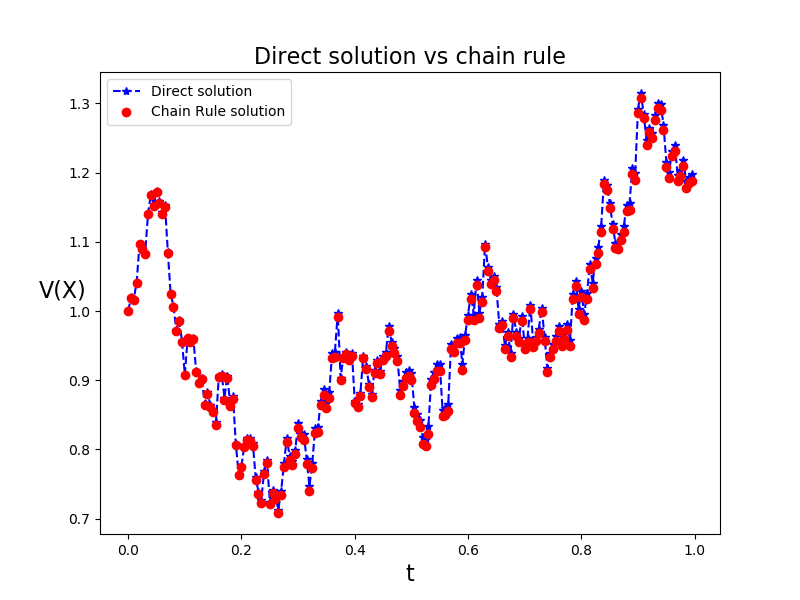

$|X_d-X_c|_\infty$ :0.01130673745262889


In [2]:
np.random.seed(42)

alpha = 2; beta=1; T=1; N=200; dt=float(T)/N;
Xzero = 1; Xzero2 = 1/np.sqrt(Xzero)

Xem1 = np.zeros(N)
Xem2 = np.zeros(N)
Xem1[0] = Xzero
Xem2[0] = Xzero2

for j in range(1,N):
    Winc = np.sqrt(dt)*np.random.randn(1)
    f1 = alpha-Xem1[j-1]
    g1 = beta*np.sqrt(abs(Xem1[j-1]))
    Xem1[j] = Xem1[j-1] + dt*f1 + g1*Winc
    
    f2 = (4*alpha-beta**2)/(8*Xem2[j-1])-Xem2[j-1]/2
    g2 = beta/2
    Xem2[j] = Xem2[j-1]+dt*f2+Winc*g2


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(np.arange(0,T,dt),np.sqrt(abs(Xem1)),'b--*',np.arange(0,T,dt),Xem2,'ro')
ax.legend(('Direct solution','Chain Rule solution'),loc=2)
ax.set_xlabel('t',fontsize=16)
ax.set_ylabel('V(X)',fontsize=16,rotation=0)
ax.set_title('Direct solution vs chain rule',fontsize=16)

Xdiff = np.linalg.norm(np.sqrt(Xem1)-Xem2,np.inf)
print('$|X_d-X_c|_\infty$ :{}'.format(Xdiff))